<a href="https://colab.research.google.com/github/9503980467/ML-Titanic_Train-Project/blob/main/titanic__train_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
adi=pd.read_csv('/content/titanic_train (1).csv')

In [ ]:
adi

In [ ]:
adi.info()

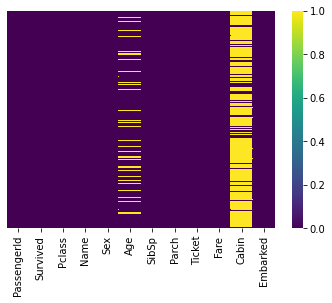

In [ ]:
sns.heatmap(adi.isnull(),cmap='viridis',yticklabels=False)

In [ ]:
adi['Survived'].unique()###

array([0, 1])

In [ ]:
sns.countplot(x='Survived',data=adi,palette='coolwarm',hue='Sex')###

In [ ]:
sns.countplot(x='Survived',data=adi,palette='viridis',hue='Pclass') ###

In [ ]:
adi.groupby('Pclass').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [ ]:
def aj(x):
  Age=x[0]
  Pclass=x[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 38
    elif Pclass==2:
      return 29
    else:
      return 25
  else:
    return Age

In [ ]:
adi['Age']=adi[['Age','Pclass']].apply(aj,axis=1)

In [ ]:
adi.drop('Cabin',axis=1,inplace=True)

In [ ]:
adi['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
adi['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
ram=pd.get_dummies(adi['Sex'],drop_first=True)

In [ ]:
print(ram)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]


In [ ]:
sham=pd.get_dummies(adi['Embarked'],drop_first=True)

In [ ]:
adi.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
adi.drop(columns=['PassengerId', 'Name', 'Sex','Ticket','Embarked' ],axis=1,inplace=True)

In [ ]:
adi.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
adi['gender']=ram

In [ ]:
print(adi)

     Survived  Pclass   Age  SibSp  Parch     Fare  gender
0           0       3  22.0      1      0   7.2500       1
1           1       1  38.0      1      0  71.2833       0
2           1       3  26.0      0      0   7.9250       0
3           1       1  35.0      1      0  53.1000       0
4           0       3  35.0      0      0   8.0500       1
..        ...     ...   ...    ...    ...      ...     ...
886         0       2  27.0      0      0  13.0000       1
887         1       1  19.0      0      0  30.0000       0
888         0       3  25.0      1      2  23.4500       0
889         1       1  26.0      0      0  30.0000       1
890         0       3  32.0      0      0   7.7500       1

[891 rows x 7 columns]


In [ ]:
pd.concat([adi,sham],axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(adi.drop('Survived',axis=1),adi['Survived'],test_size=0.4)

In [ ]:
x_train.shape

(534, 6)

In [ ]:
y_train.shape

(534,)

In [ ]:
x_test.shape

(357, 6)

In [ ]:
y_test.shape

(357,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
rj=LinearRegression()

In [ ]:
rj.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction=rj.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,prediction)

In [ ]:
correct=184+103
wrong=48+22
total=correct+wrong

In [ ]:
print(total)

357


In [ ]:
print((correct/total)*100,'%')

80.3921568627451 %
